## Overview
This document analyzes the [DBLP](http://dblp.uni-trier.de/) computer science bibliography, distributed by [AMiner](https://aminer.org/citation). I specifically analyze the [DBLP-Citation-network V10](https://static.aminer.org/lab-datasets/citation/dblp.v10.zip) dataset, containing 3,079,007 papers and 25,166,994 citations. Pre-processing of the data was performed in another file.

In [35]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
figsize=(14,8)

In [48]:
df=pd.read_pickle("data.pickle")

In [3]:
df.head()

,year,references,authors,title,out_cite,author_cnt,title_len,flow,in_cite
id,,,,,,,,,
00127ee2-cb05-48ce-bc49-9de556b93346,2013,"[51c7e02e-f5ed-431a-8cf5-f761f266d4be, 69b625b...","[Makoto Satoh, Ryo Muramatsu, Mizue Kayama, Ka...",Preliminary Design of a Network Protocol Learn...,2,8,3079007,0.000000e+00,NaN
001c58d3-26ad-46b3-ab3a-c1e557d16821,2011,"[10482dd3-4642-4193-842f-85f3b70fcf65, 3133714...","[Gareth Beale, Graeme Earl]",A methodology for the physically accurate visu...,13,2,3079007,2.061690e-08,1.0
001c8744-73c4-4b04-9364-22d31a10dbf1,2009,"[2d84c0f2-e656-4ce7-b018-90eda1c132fe, a083a1b...","[Altaf Hossain, Faisal Zaman, Mohammed Nasser,...","Comparison of GARCH, Neural Network and Suppor...",2,4,3079007,4.608480e-08,2.0
00338203-9eb3-40c5-9f31-cbac73a519ec,2011,"[8c78e4b0-632b-4293-b491-85b1976675e6, 9cdc54f...","[Jea-Bum Park, Byungmok Kim, Jian Shen, Sun-Yo...",Development of Remote Monitoring and Control D...,2,5,3079007,0.000000e+00,NaN
0040b022-1472-4f70-a753-74832df65266,1998,None,"[Giovanna Guerrini, Isabella Merlo]",Reasonig about Set-Oriented Methods in Object ...,0,2,3079007,NaN,NaN


In [50]:
df.describe()

,year,out_cite,author_cnt,title_len,flow,in_cite
count,3.079007e+06,3.079007e+06,3.079007e+06,3.079007e+06,2.725533e+06,1.985921e+06
mean,2.007767e+03,8.173737e+00,3.077669e+00,7.316575e+01,3.669007e-07,1.267271e+01
std,7.816538e+00,9.707329e+00,1.780460e+00,2.559721e+01,2.312681e-06,5.616878e+01
min,1.936000e+03,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00
25%,2.004000e+03,1.000000e+00,2.000000e+00,5.500000e+01,0.000000e+00,2.000000e+00
50%,2.010000e+03,6.000000e+00,3.000000e+00,7.100000e+01,5.301480e-08,4.000000e+00
75%,2.013000e+03,1.200000e+01,4.000000e+00,8.800000e+01,2.095020e-07,1.000000e+01
max,2.018000e+03,1.532000e+03,3.510000e+02,4.760000e+02,7.349310e-04,1.622900e+04


The dataframe consists of 6 columns. Most are self explanitory, except for `flow`, which referes to the Eigenfactor score of a given paper. These scores were generated by running: `./infomap dblp.pajek output -t --inner-parallelization -i pjk`

Of note is that the collection spans from 1936 to 2018, with a maximum of 1,523 out citations ("Image analysis and computer vision : 1998"), and 16,229 in citations ("Distinctive Image Features from Scale-Invariant Keypoints").

In [6]:
df.sort_values("flow", ascending=False)[["year","title","flow"]].head()

,year,title,flow
id,,,
6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3,1989,"Genetic Algorithms in Search, Optimization and...",0.000735
b944f77f-113b-4a02-ae5e-d4a124b8fd5b,2004,Distinctive Image Features from Scale-Invarian...,0.000599
c1b6b493-01ef-420f-be44-7bacfe34e846,2011,LIBSVM: A library for support vector machines,0.000474
a662a4e7-415e-417e-8a8f-fe085d7e487f,1974,The Design and Analysis of Computer Algorithms,0.000416
d3e00e7e-1c64-4d7a-b2b2-1ad98ba4c706,1988,Probabilistic Reasoning in Intelligent Systems...,0.000372


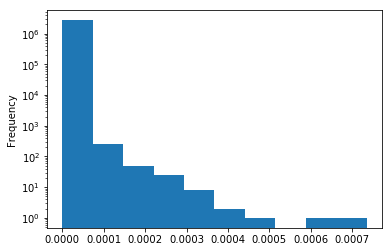

In [14]:
df.flow.plot(kind="hist", logy=True, title="Histogram of Eigenfactor Scores")

In [7]:
df.sort_values("in_cite", ascending=False)[["year","title","in_cite"]].head()

,year,title,in_cite
id,,,
b944f77f-113b-4a02-ae5e-d4a124b8fd5b,2004,Distinctive Image Features from Scale-Invarian...,16229.0
c1b6b493-01ef-420f-be44-7bacfe34e846,2011,LIBSVM: A library for support vector machines,13475.0
6a6b9aa6-683f-4c7c-b06e-9c3018d10fd3,1989,"Genetic Algorithms in Search, Optimization and...",13267.0
dd83785a-dd19-41e3-9b25-ebabbd48d336,2005,Histograms of oriented gradients for human det...,8477.0
f6bd8b64-684d-429a-aab5-8ff3a2c23cd6,2001,Random Forests,7968.0


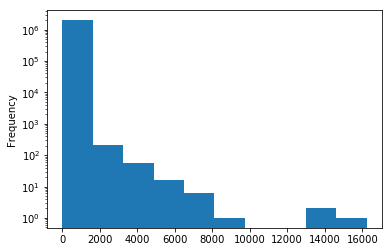

In [12]:
df.in_cite.plot(kind="hist", logy=True, title="Histogram of in-citations")

In [8]:
df.sort_values("out_cite", ascending=False)[["year","title","out_cite"]].head()

,year,title,out_cite
id,,,
da170252-5470-4ed6-947f-04003976f579,1999,Image analysis and computer vision : 1998,1532
ac2acfac-4597-4ebd-b1c5-08c888d73271,1997,Image analysis and computer vision: 1996,1362
d3be0271-593b-44e9-a2c4-cacb26dc1833,2000,Image analysis and computer vision: 1999,1001
c6090c87-4730-4ae6-86cd-7663adb23b2b,2002,Comprehensive frequency-dependent substrate no...,759
d0c11ccc-e743-4a45-bbbc-ba5030b78e33,1991,Image analysis and computer vision: 1990,734


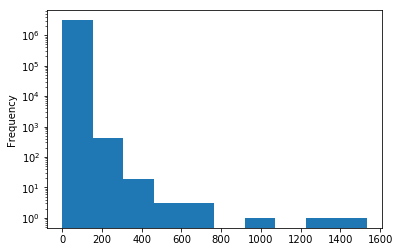

In [11]:
df.out_cite.plot(kind="hist", logy=True, title="Histogram of out-citations")

In [15]:
df.sort_values("author_cnt", ascending=False)[["year","title","author_cnt"]].head()

,year,title,author_cnt
id,,,
5de90b6c-92cb-40f5-898a-5eecd10c3d14,2017,Construction and Analysis of Weighted Brain Ne...,351
23d6baa9-65fb-4cd1-a470-63b4227f2955,2015,The IceProd framework : Distributed data proce...,286
2c12b8a7-4258-4513-b40a-475427d492c5,2014,A promoter-level mammalian expression atlas,261
66fe9d26-426c-4c98-ab7e-fe71dd4d48ed,2006,Length Sensing and Control in the Virgo Gravit...,119
106b4db9-2ae6-4744-9533-f7809345f1ca,2002,An Overview of the BlueGene/L Supercomputer,115


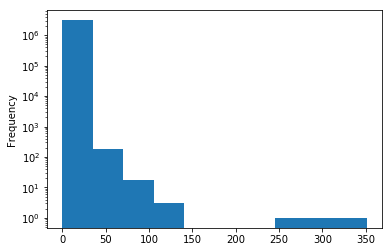

In [16]:
df.author_cnt.plot(kind="hist", logy=True, title="Histogram of author counts")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1e7ffb860>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x1e801fb38>], dtype=object)

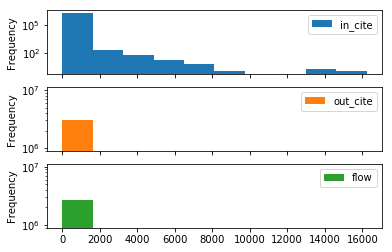

In [56]:
df[["in_cite","out_cite","flow"]].plot(kind="hist", logy=True, subplots=True)

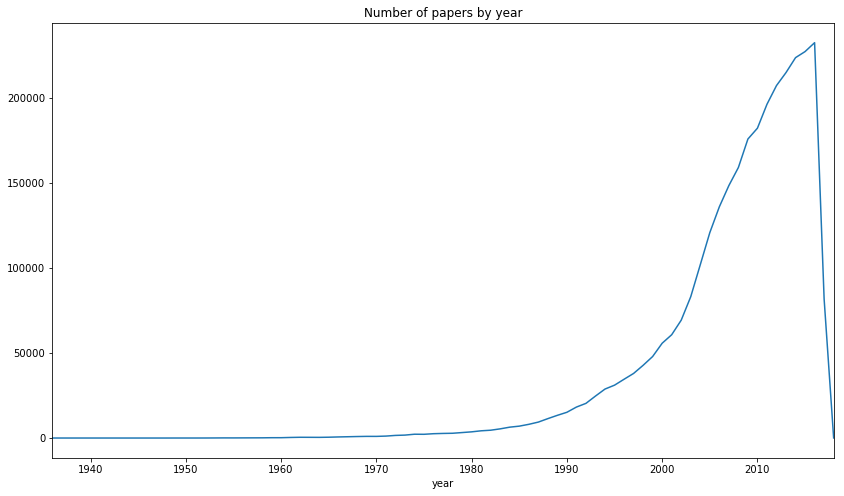

In [40]:
df.groupby("year").size().plot(title="Number of papers by year", figsize=figsize)

The question we are investigating is if the introduction of academic scholarly recommenders impacts what papers are cited.

A common method for calculating inequality is via the Gini coefficient. We calculate the Gini coefficient for a non-decreasing $y_i <= y_{i+1}$ as: $$G = \frac{1}{n}(n+1-2\frac{\sum_{i=1}^{n} (n+1-i)y_i}{\sum_{i=1}^{n}y_i})$$

In [21]:
def gini(vs):
    if isinstance(vs, pd.Series):
        vs = vs.values
    vs = vs[~np.isnan(vs)]
    s = 0
    n = len(vs)
    vs.sort()
    svs = sum(vs)
    if svs == 0:
        return 0
    for i, y in enumerate(vs, start=1):
        s+=(n+1-i)*y
    return 1/n*(n+1-2*s/svs)

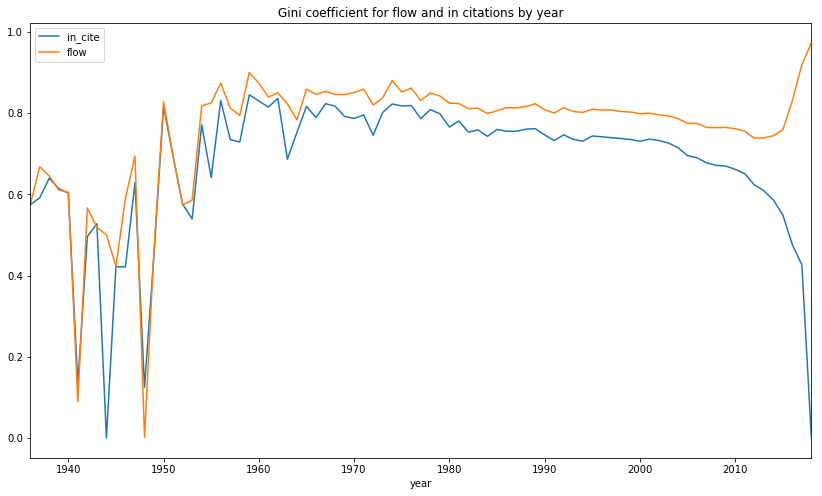

In [45]:
gi = df[["year","in_cite"]].groupby("year").agg(gini)
gf = df[["year","flow"]].groupby("year").agg(gini)
gi.join(gf).plot(title="Gini coefficient for flow and in-citations by year", figsize=figsize)

In [25]:
def lorenz_curve(ds, quantiles=[.2,.4,.6,.8,1]):
    breaks = ds.quantile(quantiles)
    t = ds.sum()
    cs = [ds[ds <= b].sum()/t for b in breaks]
    cs.insert(0, 0)
    quantiles.insert(0,0)
    return pd.Series(cs, index=quantiles)

def plot_lorenz(ls):
    ax = ls.plot(title="Lorenz Curve", l)
    ax.plot([0,1],[0,1])

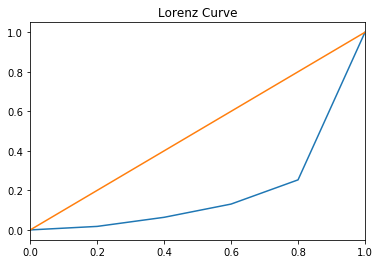

In [26]:
plot_lorenz(lorenz_curve(df.in_cite))

Since we are investigating how citation patterns have changed over time we first look at the average number of citations overtime. The below diagrram shows an increasing number of citations being made by papers overtime, while papers were cited at a somewhat constant rate until roughly 2000, which marked a decrease in average number paper in citations. While papers do take time to be embedded in the citation graph, it is generally considered to be less than the time observed here.

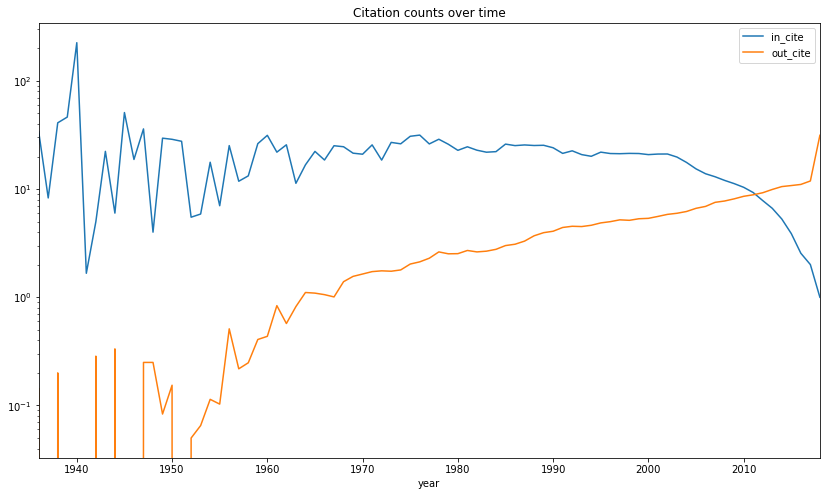

In [37]:
df[["in_cite", "out_cite", "year"]].groupby("year").mean().plot(logy=True, figsize=figsize, title="Citation counts over time")

In [49]:
df[["in_cite", "out_cite", "year", "author_cnt", "title_len"]].corr()

,in_cite,out_cite,year,author_cnt,title_len
in_cite,1.000000,0.082356,-0.102966,-0.006078,-0.053284
out_cite,0.082356,1.000000,0.221947,0.069297,0.000437
year,-0.102966,0.221947,1.000000,0.230172,0.185475
author_cnt,-0.006078,0.069297,0.230172,1.000000,0.129574
title_len,-0.053284,0.000437,0.185475,0.129574,1.000000


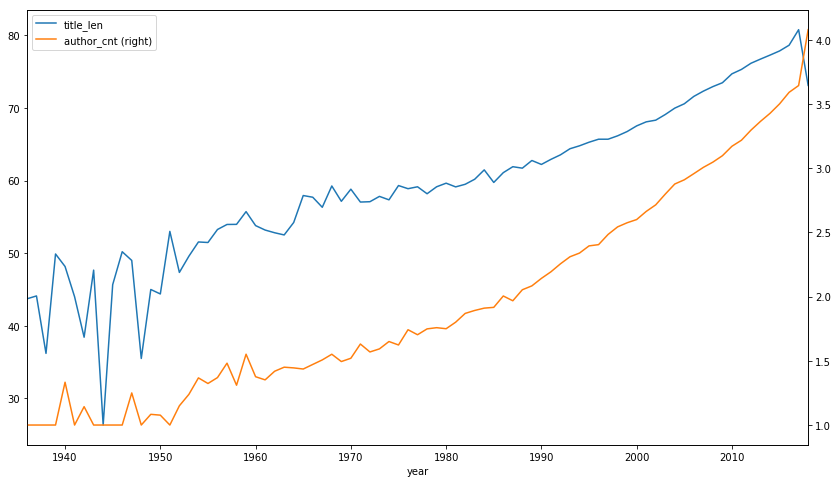

In [55]:
df[["title_len", "author_cnt", "year"]].groupby("year").mean().plot(figsize=figsize, secondary_y=["author_cnt"])

## Conclusions